<h1 style="background:lightblue; color:blue; line-height:2">Business Context</h1>
<h3 style="color:green; line-height:1.5">1. This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.<br>
2. Data for the case is available in CSV format having 6362620 rows and 10 columns.<br>
3. Candidates can use whatever method they wish to develop their machine learning model.<br>
4. Following usual model development procedures,<br>
&emsp; &emsp; The model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.</h3>

<h1 style="background:lightblue; color:blue; line-height:2">Project Detail and Data Set</h1>

Click Link: https://drive.google.com/file/d/12yn0f1nsvo5MvS92Q_BSFcHBstHCElK-/view?usp=sharing

<h1 style="background:lightblue; color:blue; line-height:2">Data Dictionary</h1>
<h3 style="color:gray; line-height:1.5"><b style="color:blue">1. step</b> - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).<br>
    <b style="color:blue">2. type</b> - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.<br>
    <b style="color:blue">3. amount</b> - amount of the transaction in local currency.<br>
    <b style="color:blue">4. nameOrig</b> - customer who started the transaction<br>
    <b style="color:blue">5. oldbalanceOrg</b> - initial balance before the transaction<br>
    <b style="color:blue">6. newbalanceOrig</b> - new balance after the transaction<br>
    <b style="color:blue">7. nameDest</b> - customer who is the recipient of the transaction<br>
    <b style="color:blue">8. oldbalanceDest</b> - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).<br>
    <b style="color:blue">9. newbalanceDest</b> - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).<br>
    <b style="color:blue">10. isFraud</b> - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.<br>
    <b style="color:blue">11. isFlaggedFraud</b> - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.</h3>

<h3 style="color:blue; background:lightgreen; line-height:2">Import Basic Required Libraries and Packages</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

<h3 style="color:blue; background:lightgreen; line-height:2">Load and Read the Dataset</h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<h3 style="color:blue; background:lightgreen; line-height:2">Data Understanding</h3>

In [4]:
df.shape

(6362620, 11)

<b><code style="color:green">Dataset contains 6.3M rows and 11 columns.</code><b>

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<b><code style="color:green">Data type for all the columns is suitable type, no need to change any data type.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Statistical Information</h3>

In [9]:
df.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,243.0,142.0,1.0,156.0,239.0,335.0,743.0
amount,6362620.0,179862.0,603858.0,0.0,13390.0,74872.0,208721.0,92445517.0
oldbalanceOrg,6362620.0,833883.0,2888243.0,0.0,0.0,14208.0,107315.0,59585040.0
newbalanceOrig,6362620.0,855114.0,2924049.0,0.0,0.0,0.0,144258.0,49585040.0
oldbalanceDest,6362620.0,1100702.0,3399180.0,0.0,0.0,132706.0,943037.0,356015889.0
newbalanceDest,6362620.0,1224996.0,3674129.0,0.0,0.0,214661.0,1111909.0,356179279.0
isFraud,6362620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
isFlaggedFraud,6362620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1902386530,3
nameDest,6362620,2722362,C1286084959,113


<h3 style="color:blue">Key Finding in Descriptive Statistics</h3>
<h3 style="color:green; line-height:1.1">1. The Average Transaction amount is 179K, Minimum amount is 0 ans Maximum amount is 92.4M<br>
    2. The Average old balance of the Source account holder is 833K, Minimum balance is 0, Maximum balance 59.5M.<br>
    3. The Average new balance of the Source account holder is 855K, Minimum balance is 0, Maximum balance 49.5M.<br>
    4. The Average old balance of the Destination/recieving account holder is 1.1M, Minimum balance is 0, Maximum balance 356M.<br>
    5. The Average new balance of the Destination/recieving account holder is 1.2M, Minimum balance is 0, Maximum balance 356.1M.
    6. There are 5 Unique type of transaction happened.<br>
    7. There are total 6.35M unique Source acount holder and 2.72M Destination/recieving account holder.</h3>

<h3 style="color:blue; background:lightgreen; line-height:2">Missing Values</h3>

In [11]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<b><code style="color:green">No missing values in the dataset.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Duplicate Rows</h3>

In [12]:
df.duplicated().sum()

0

<b><code style="color:green">No Duplicate rows in the dataset</code></b>

<h1 style="background:lightblue; color:blue; line-height:1">Exploratory Data Analysis</h1>

<h2 style="background:lightblue; color:blue; line-height:1.5">1. Univariate Analysis</h2>

In [19]:
#fuction to add data label
def add_data_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], ha="center", fontsize=15)

<h3 style="color:blue; background:lightgreen; line-height:2">Analyze Ammount Column</h3>

In [ ]:
df['amount'].aggregate([np.mean, np.std, np.min, np.max]).round(0)

mean      179862.0
std       603858.0
amin           0.0
amax    92445517.0
Name: amount, dtype: float64

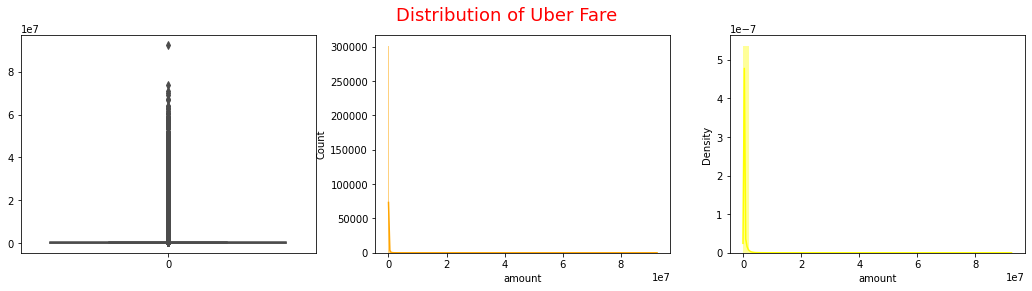

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['amount'], color='blue')

plt.subplot(132)
sns.histplot(df['amount'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['amount'], color='yellow')

plt.suptitle("Distribution of Ammount", fontsize=18, color='red');

<h3 style="color:blue; background:lightgreen; line-height:2">Analyze Old Balance in Original Account</h3>

In [ ]:
df['oldbalanceOrg'].aggregate([np.mean, np.std, np.min, np.max]).round(0)

mean      833883.0
std      2888243.0
amin           0.0
amax    59585040.0
Name: oldbalanceOrg, dtype: float64

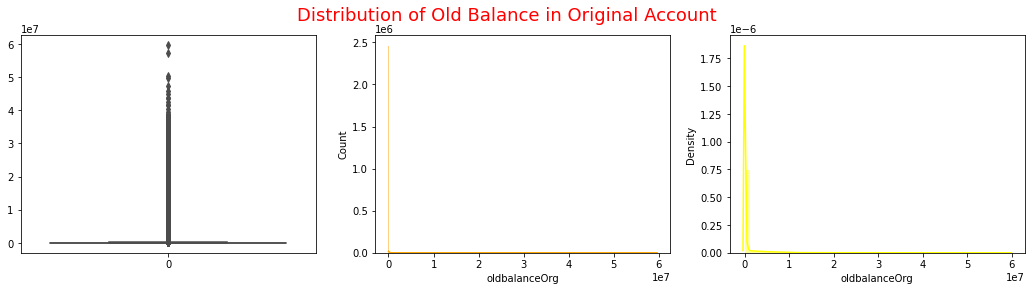

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['oldbalanceOrg'], color='blue')

plt.subplot(132)
sns.histplot(df['oldbalanceOrg'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['oldbalanceOrg'], color='yellow')

plt.suptitle("Distribution of Old Balance in Original Account", fontsize=18, color='red');

<h3 style="color:blue; background:lightgreen; line-height:2">Analyze New Balance in Original Account</h3>

In [ ]:
df['newbalanceOrig'].aggregate([np.mean, np.std, np.min, np.max]).round(0)

mean      855114.0
std      2924049.0
amin           0.0
amax    49585040.0
Name: newbalanceOrig, dtype: float64

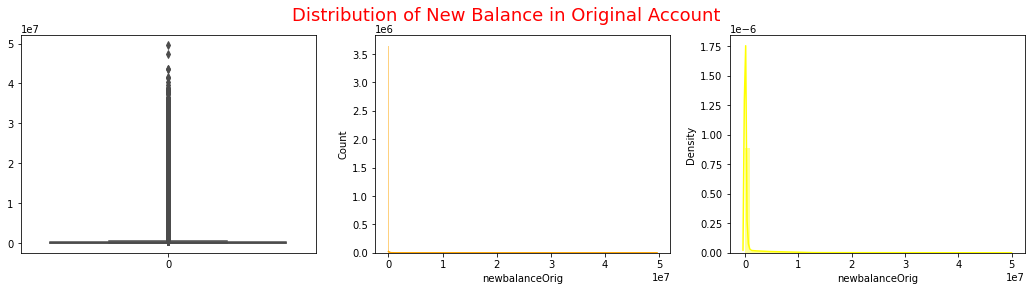

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['newbalanceOrig'], color='blue')

plt.subplot(132)
sns.histplot(df['newbalanceOrig'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['newbalanceOrig'], color='yellow')

plt.suptitle("Distribution of New Balance in Original Account", fontsize=18, color='red');

<h3 style="color:blue; background:lightgreen; line-height:2">Analyze Old Balance in Destination Account</h3>

In [ ]:
df['oldbalanceDest'].aggregate([np.mean, np.std, np.min, np.max]).round(0)

mean      1100702.0
std       3399180.0
amin            0.0
amax    356015889.0
Name: oldbalanceDest, dtype: float64

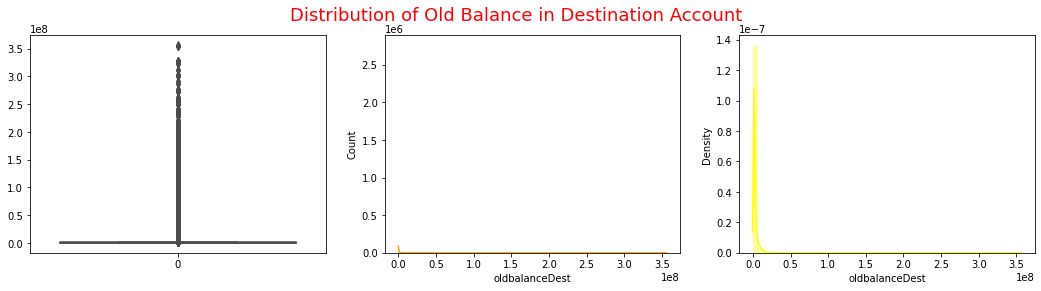

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['oldbalanceDest'], color='blue')

plt.subplot(132)
sns.histplot(df['oldbalanceDest'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['oldbalanceDest'], color='yellow')

plt.suptitle("Distribution of Old Balance in Destination Account", fontsize=18, color='red');

<h3 style="color:blue; background:lightgreen; line-height:2">Analyze New Balance in Destination Account</h3>

In [ ]:
df['newbalanceDest'].aggregate([np.mean, np.std, np.min, np.max]).round(0)

mean      1224996.0
std       3674129.0
amin            0.0
amax    356179279.0
Name: newbalanceDest, dtype: float64

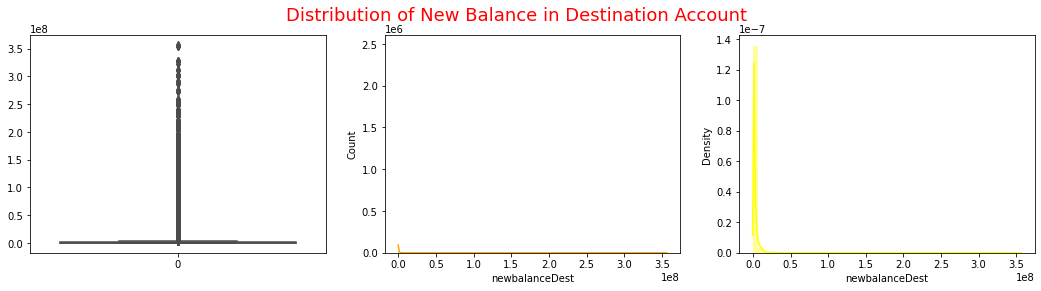

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['newbalanceDest'], color='blue')

plt.subplot(132)
sns.histplot(df['newbalanceDest'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['newbalanceDest'], color='yellow')

plt.suptitle("Distribution of New Balance in Destination Account", fontsize=18, color='red');

<b><code style="color:green">We clearly see that the all numerical columns are have outliers and outliers are large in numbers so instead of trimming or capping we use transformation techniques, such as square root or boxcox transformation technique.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Types of Payment Done/Processed</h3>

In [ ]:
payment_type=pd.DataFrame(df['type'].value_counts()).reset_index()
payment_type['percentage']=round((payment_type['count']/df.shape[0])*100, 2)
payment_type

,type,count,percentage
0,CASH_OUT,2237500,35.17
1,PAYMENT,2151495,33.81
2,CASH_IN,1399284,21.99
3,TRANSFER,532909,8.38
4,DEBIT,41432,0.65


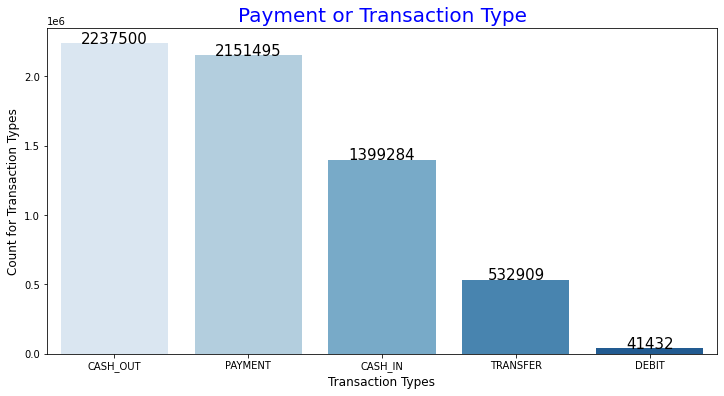

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='type', y='count', data=payment_type, palette='Blues')
plt.title("Payment or Transaction Type", color='Blue', fontsize=20)
plt.xlabel("Transaction Types", fontsize=12)
plt.ylabel("Count for Transaction Types", fontsize=12)

add_data_label(payment_type['type'], payment_type['count']);

<b><code style="color:green">35% Transaction are of Cash Out type, 33% are Payment type, 21% are Cash In type, 8% are Transfer type and 0.65% transactions are Debit type.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Count of Fraud and Non-Fraud Transaction</h3>

In [ ]:
transaction_type=pd.DataFrame(df['isFraud'].value_counts()).reset_index()
transaction_type['percentage']=round((transaction_type['count']/df.shape[0])*100, 2)
transaction_type

,isFraud,count,percentage
0,0,6354407,99.87
1,1,8213,0.13


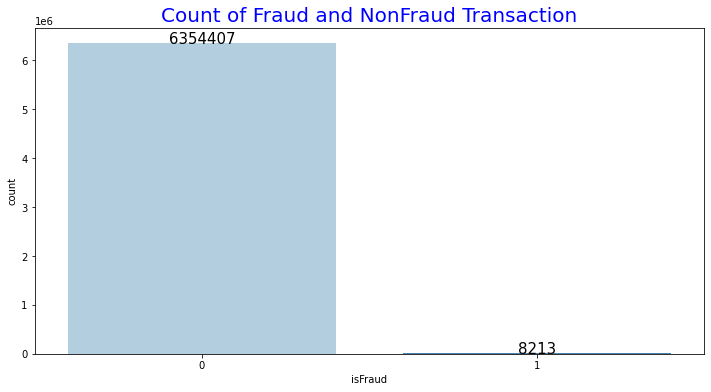

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='isFraud', y='count', data=transaction_type, palette='Blues')
plt.title("Count of Fraud and NonFraud Transaction", color='Blue', fontsize=20)

add_data_label(transaction_type['isFraud'], transaction_type['count']);

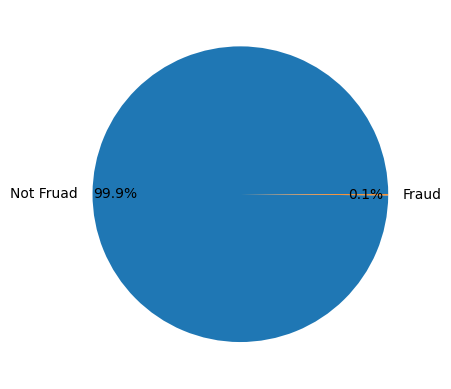

In [28]:
plt.pie(df.isFraud.value_counts(), labels=['Not Fruad','Fraud'],
        autopct='%1.1f%%', pctdistance=0.85);

<b><code style="color:green">99.87% Transactions are non-fraud and only 0.13% transactions are fraud.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Count of Flagged Fraud and Non-Fraud Transaction</h3>

In [ ]:
transaction_type=pd.DataFrame(df['isFlaggedFraud'].value_counts()).reset_index()
transaction_type['percentage']=round((transaction_type['count']/df.shape[0])*100, 5)
transaction_type

,isFlaggedFraud,count,percentage
0,0,6362604,99.99975
1,1,16,0.00025


<b><code style="color:green">99.99% Transactions are Flagged as non-fraud and only 0.00025% transactions are flagged as fraud.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Analyzing Initial/Origine customers and Recieving/Destination customer</h3>

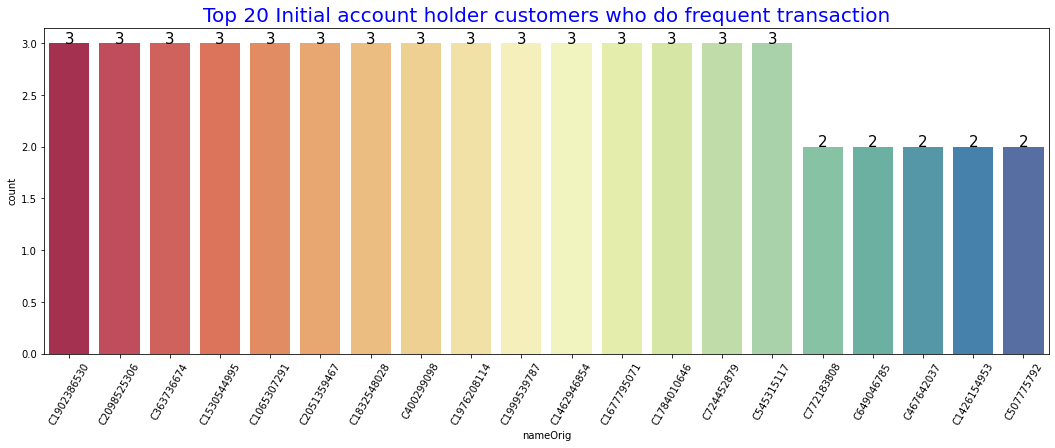

In [ ]:
#Top 20 Initial account holder customers who do frequent transaction
plt.figure(figsize=(18,6))
sns.countplot(x='nameOrig', data=df, palette='Spectral',
             order=df['nameOrig'].value_counts().sort_values(ascending=False)[:20].index)
plt.title("Top 20 Initial account holder customers who do frequent transaction", fontsize=20, color='blue')
plt.xticks(rotation=60)

index=df['nameOrig'].value_counts().sort_values(ascending=False)[:20].index
values=df['nameOrig'].value_counts().sort_values(ascending=False)[:20].values
add_data_label(index, values);

<b><code style="color:green">Above grapgh shows the top 20 Customers ID.</code></b>

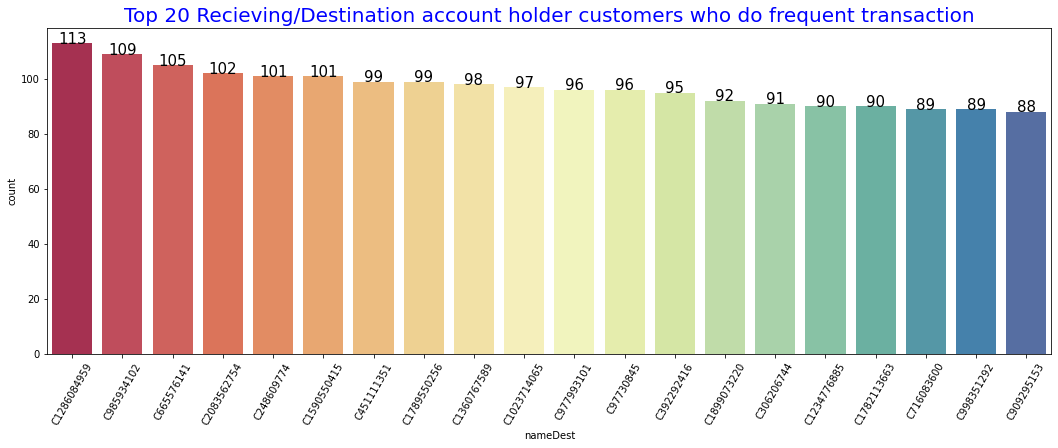

In [ ]:
#Top 20 Recieving/Destination account holder customers who do frequent transaction
plt.figure(figsize=(18,6))
sns.countplot(x='nameDest', data=df, palette='Spectral',
             order=df['nameDest'].value_counts().sort_values(ascending=False)[:20].index)
plt.xticks(rotation=60)
plt.title("Top 20 Recieving/Destination account holder customers who do frequent transaction", fontsize=20, color='blue');

index=df['nameDest'].value_counts().sort_values(ascending=False)[:20].index
values=df['nameDest'].value_counts().sort_values(ascending=False)[:20].values
add_data_label(index, values);

<b><code style="color:green">Above grapgh shows the top 20 Customers ID.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Analyzing Step column</h3>

<Axes: xlabel='step', ylabel='Density'>

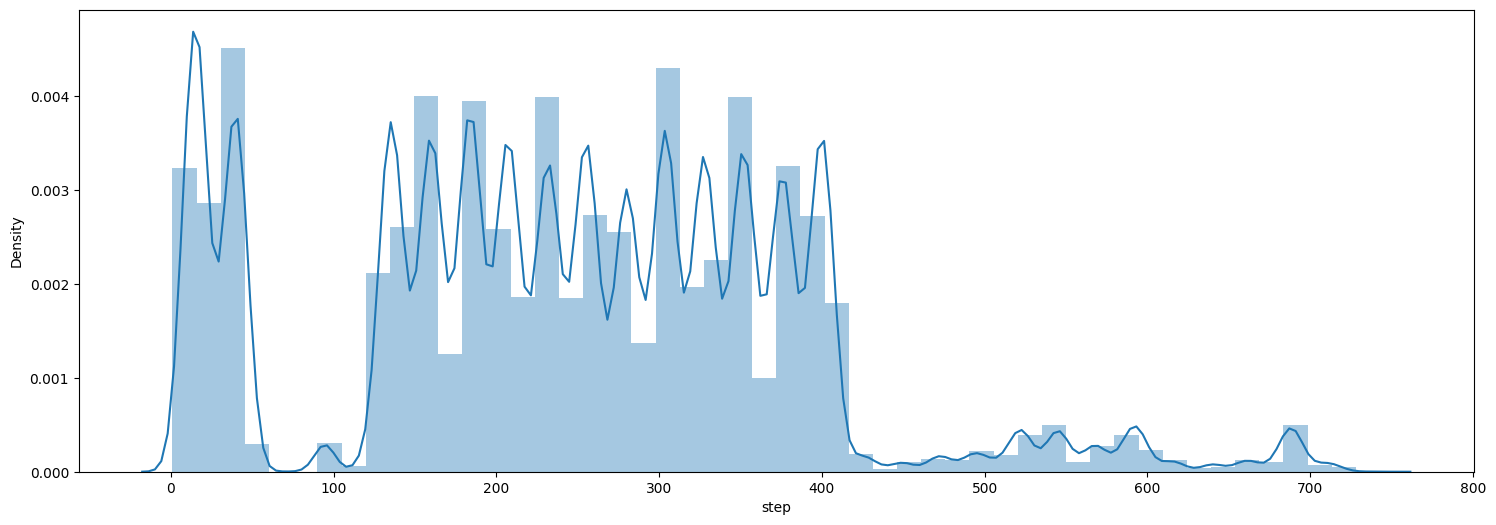

In [16]:
plt.figure(figsize=(18, 6))
sns.distplot(df['step'], bins=50)

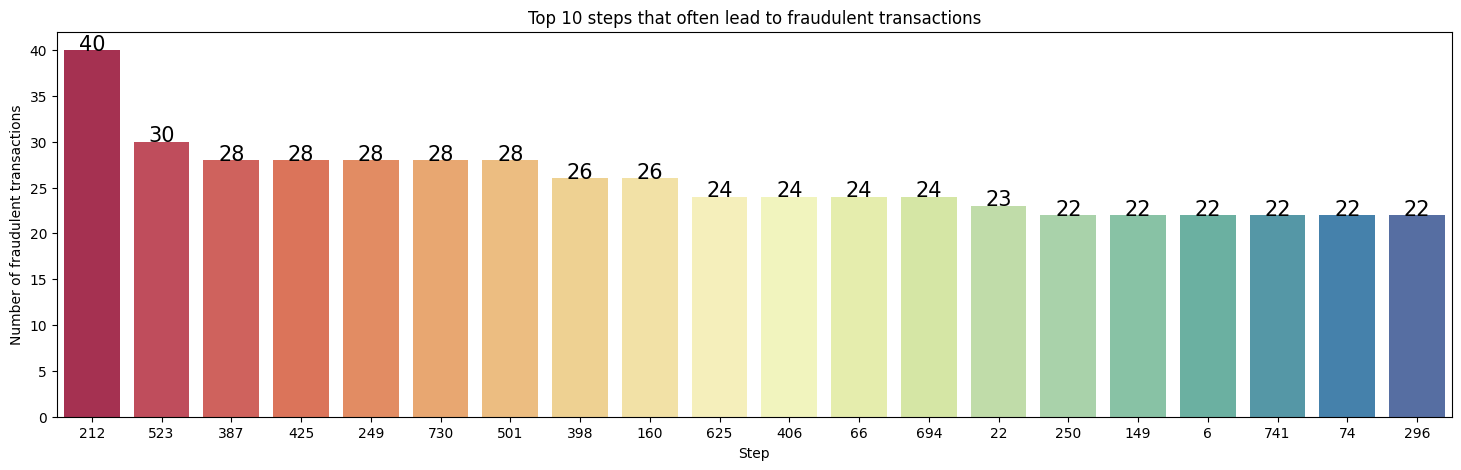

In [22]:
df1=df[df['isFraud']==1]

plt.figure(figsize=(18,5))
sns.countplot(x=df1['step'], palette='Spectral',
              order=df1['step'].value_counts().sort_values(ascending=False)[:20].index);

plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')

index=df1['step'].value_counts().sort_values(ascending=False)[:20].index
values=df1['step'].value_counts().sort_values(ascending=False)[:20].values
add_data_label(index,values)

<b><code style="color:green">Step 212 has most fraud transaction.</code></b>

<h2 style="background:lightblue; color:blue; line-height:1.5">2. Bivariate Analysis</h2>

<h3 style="color:blue; background:lightgreen; line-height:2">Count of fraud and non-fraud transaction with respect to trasaction type</h3>

In [24]:
pd.crosstab(index=df['type'], columns=df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<b><code style="color:green">1. Fraud happen when the transaction is of Cash Out and Transfer type.<br>2. No fraud in the transaction type Cash In, Debit and Payment.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Analyzing IsFlaggedFraud vs isFraud columns</h3>

In [25]:
pd.crosstab(index=df['isFlaggedFraud'], columns=df['isFraud'])

isFraud,0,1
isFlaggedFraud,,
0,6354407,8197
1,0,16


<b><code style="color:green">Only 16 transaction are flagged as fraud and those are actually a fraud.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Relationship between Fruadulent transaction and Numerical columns</h3>

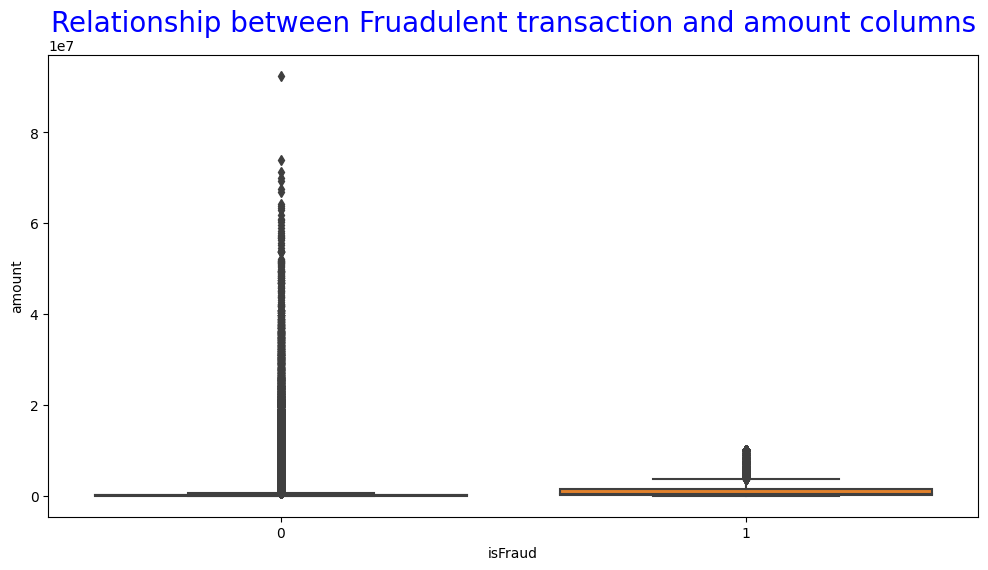

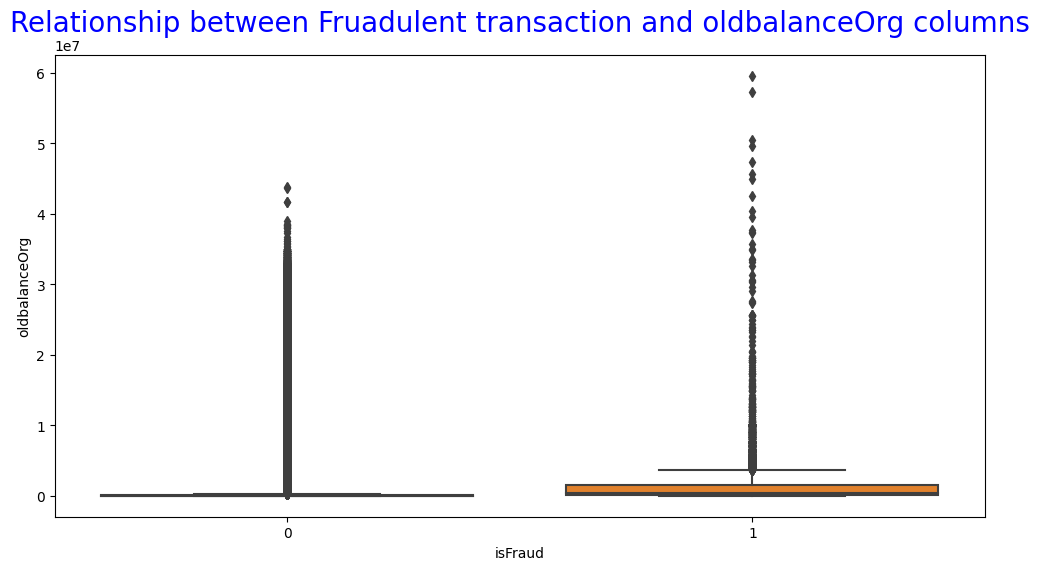

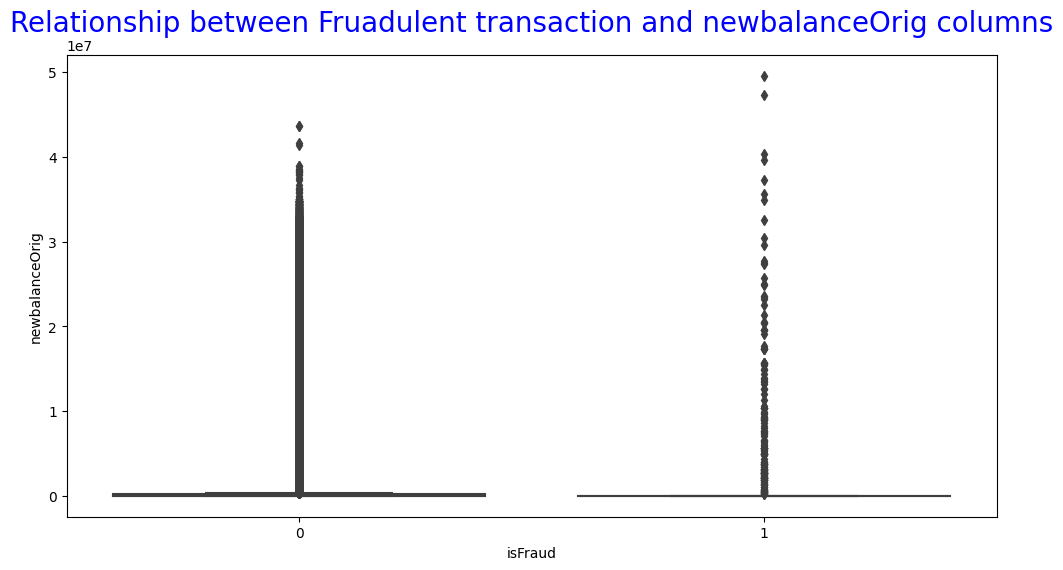

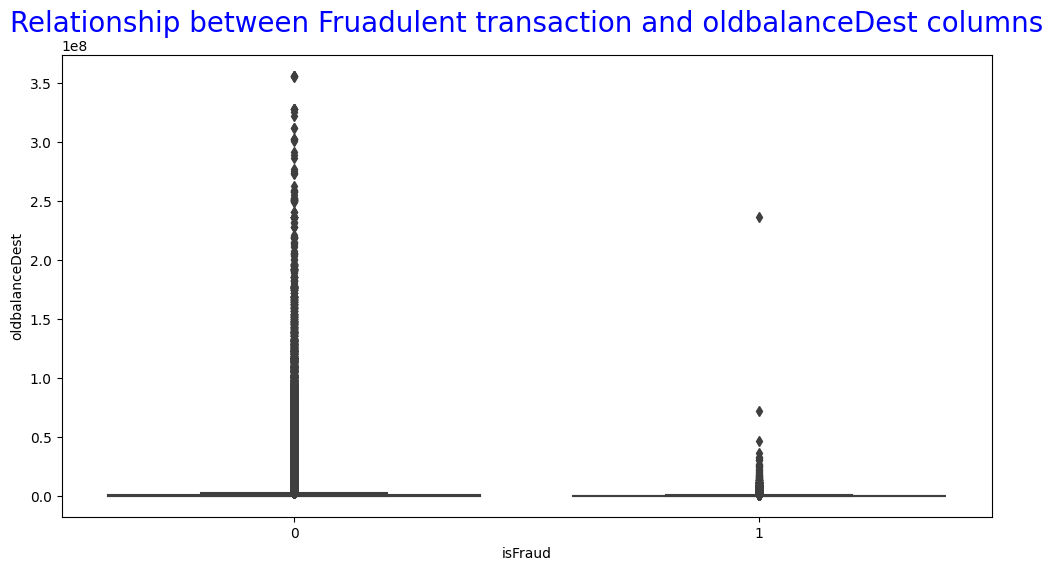

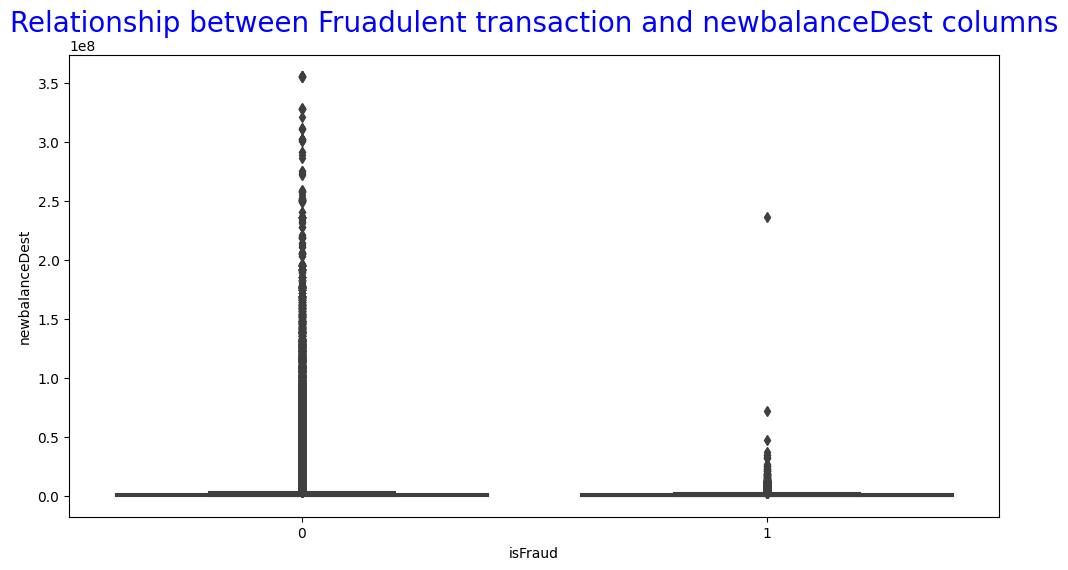

In [10]:
num_col=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in num_col:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=df[col], x=df['isFraud'])
    plt.title("Relationship between Fruadulent transaction and {} columns".format(col), fontsize=20, color='blue');

<b><code style="color:green">Average for all transaction money related column is almost equal.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Flagged Fraud and Actual Fraud vs Transaction type</h3>

In [14]:
flag_fraud_vs_type=pd.crosstab(index=df['type'], columns=[df['isFraud'], df['isFlaggedFraud']] )
flag_fraud_vs_type

isFraud               0     1    
isFlaggedFraud        0     0   1
type                             
CASH_IN         1399284     0   0
CASH_OUT        2233384  4116   0
DEBIT             41432     0   0
PAYMENT         2151495     0   0
TRANSFER         528812  4081  16

<b><code style="color:green">Only 16 transaction are flagged as Fraud and all these transaction are of Transfer type.</code></b>

<h2 style="background:lightblue; color:blue; line-height:1.5">3. Multivariate Analysis</h2>

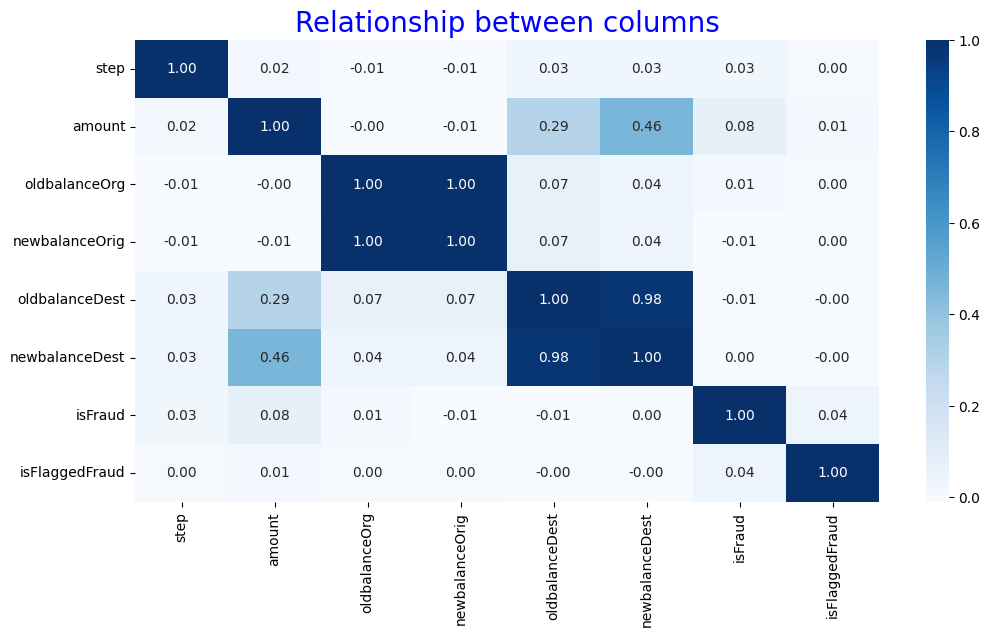

In [17]:
corr=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".2f")
plt.title("Relationship between columns", color='blue', fontsize=20);

<b><code style="color:green">1. There is a high correlation between newbalanceOrig and oldbalanceOrg.<br> 2. High correlation between newbalanceDest and oldbalanceDest.<br> 3. relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest.<br>4. Multicolinearlity is not problem in classification.</code></b>

<h1 style="background:lightblue; color:blue; line-height:1">Outlier Treatment in Numerical Columns using Tranformation Techniques: BOXCOX</h1>

<b><code style="color:green">Earlier we clearly see that the all numerical columns are have outliers and outliers are large in numbers so instead of trimming or capping we use transformation techniques, such as square root or boxcox transformation technique.</code></b>

In [6]:
from scipy.stats import boxcox
df['amount'],_=boxcox(df['amount']+1)
df['oldbalanceOrg'],_=boxcox(df['oldbalanceOrg']+1)
df['newbalanceOrig'],_=boxcox(df['newbalanceOrig']+1)
df['oldbalanceDest'],_=boxcox(df['oldbalanceDest']+1)
df['newbalanceDest'],_=boxcox(df['newbalanceDest']+1)

<h3 style="color:blue; background:lightgreen; line-height:2">Analyzing the numerical column after applying BOXCOX transformation.</h3>

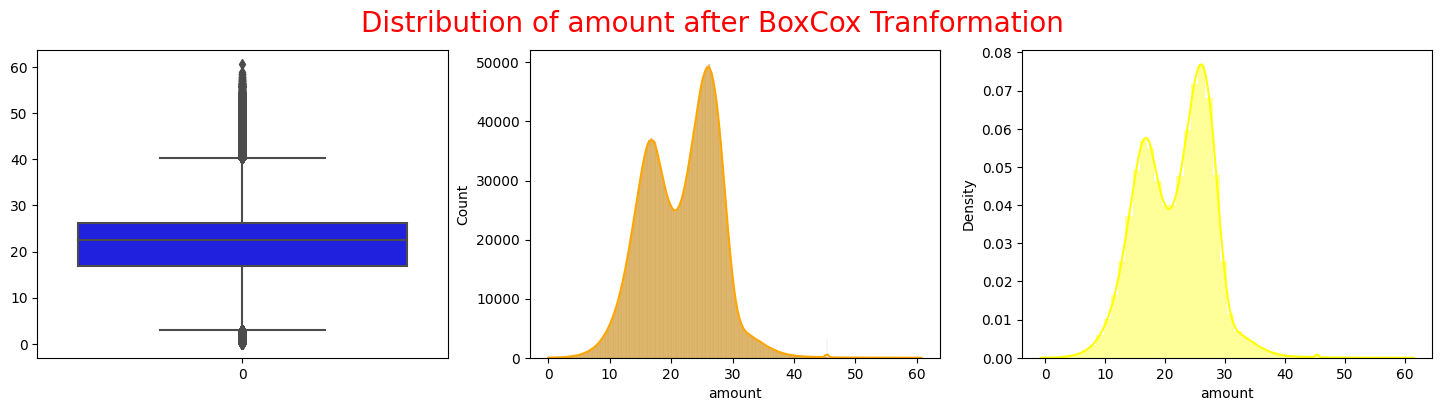

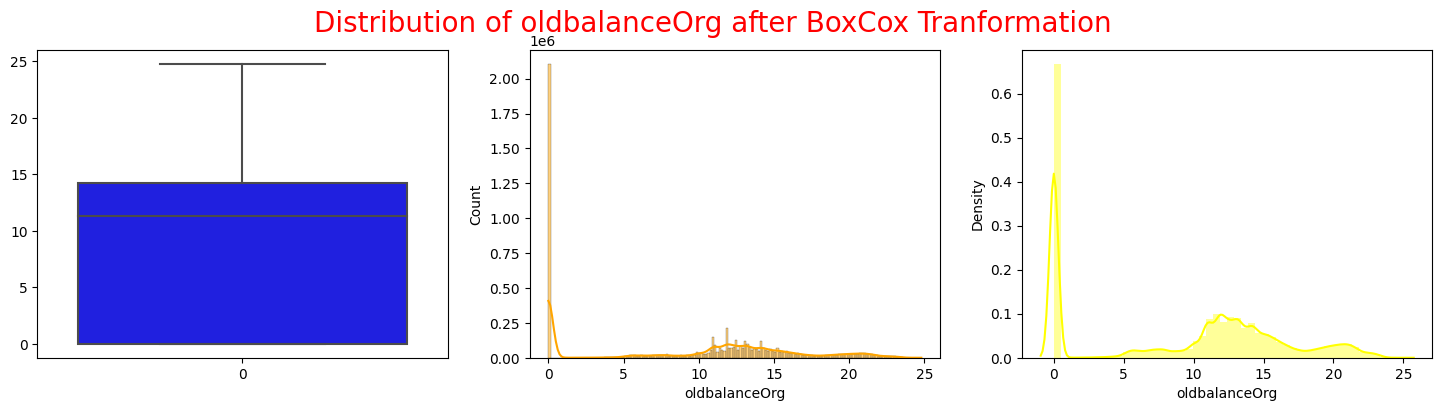

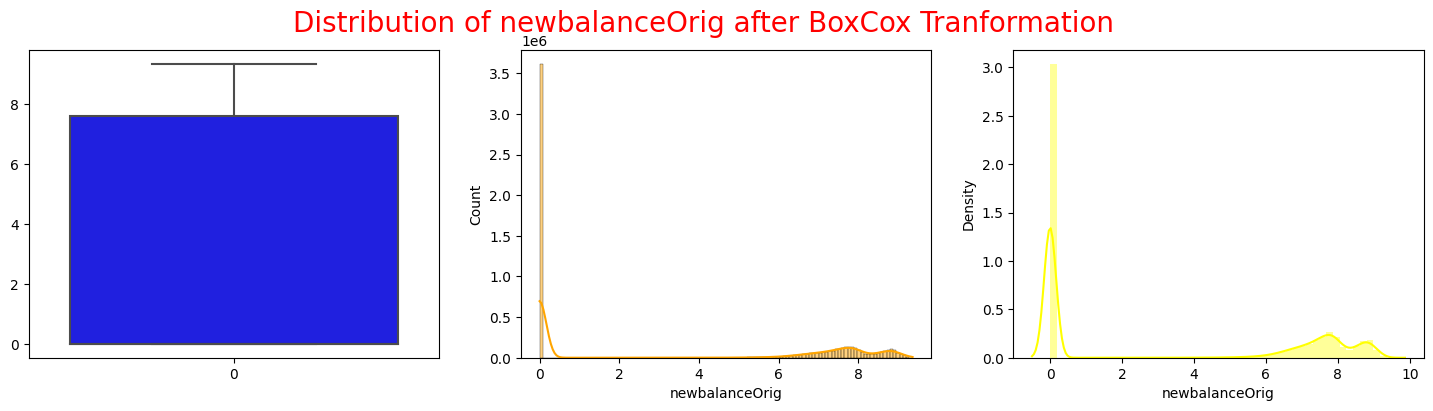

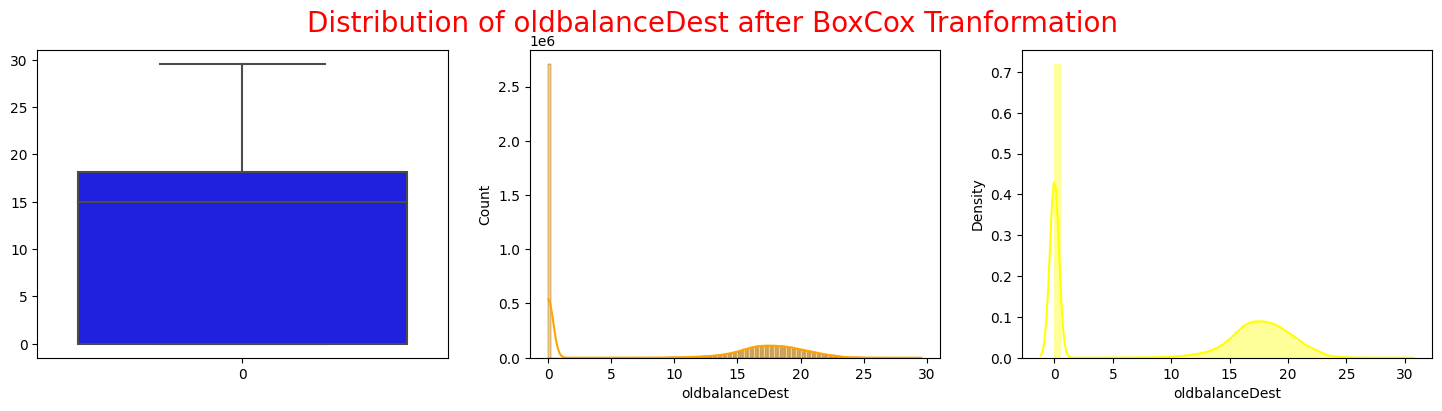

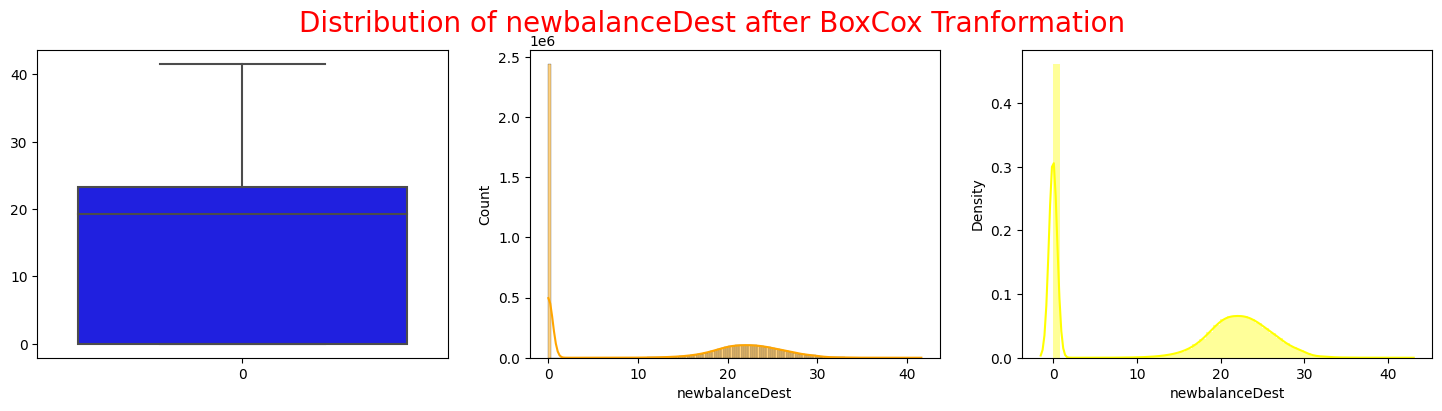

In [27]:
num_col=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in num_col:
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    sns.boxplot(df[col], color='blue')

    plt.subplot(132)
    sns.histplot(df[col], color='orange', kde=True)

    plt.subplot(133)
    sns.distplot(df[col], color='yellow')

    plt.suptitle("Distribution of {} after BoxCox Tranformation".format(col), fontsize=20, color='red');

<b><code style="color:green">After BoxCox transformation, distribution of all the numerical column is nearly a normal(not exactly normal). We cannot find outliers now but still we see the right skewness in all numerical columns.</code></b>

<h3 style="color:blue; background:lightgreen; line-height:2">Divide data into Input and Output</h3>

In [7]:
X=df.drop('isFraud', axis=1)
y=df['isFraud']

<h3 style="color:blue; background:lightgreen; line-height:2">Split data into training and testing sets</h3>

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5090096, 10) (1272524, 10) (5090096,) (1272524,)


<h1 style="background:lightblue; color:blue; line-height:1">Data Preprocessing</h1>

<h3 style="color:blue; background:lightgreen; line-height:2">Convert Categorical columns to numeric</h3>

In [9]:
x_train["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5}, inplace=True)
x_test["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5}, inplace=True)

In [10]:
#Convert Nameorigin and Namedestination column to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['nameOrig']=le.fit_transform(x_train['nameOrig'])
x_train['nameDest']=le.fit_transform(x_train['nameDest'])

x_test['nameOrig']=le.fit_transform(x_test['nameOrig'])
x_test['nameDest']=le.fit_transform(x_test['nameDest'])

In [11]:
x_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
5310745,373,1,28.263644,279453,5.983722,0.000000,361620,20.05138,26.000743,0
1213562,133,2,19.675230,1743413,12.025917,0.000000,632588,0.00000,0.000000,0
1812382,163,2,18.402910,18593,0.000000,0.000000,2145088,0.00000,0.000000,0
5984721,408,2,11.062436,2890451,12.406069,6.952569,1139591,0.00000,0.000000,0
3738325,278,2,17.370195,1993585,1.119774,0.000000,883457,0.00000,0.000000,0


In [12]:
x_test.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
4720495,332,2,9.886977,1139548,11.848623,6.783133,727020,0.000000,0.000000,0
826696,41,1,24.516962,1028073,0.000000,0.000000,266560,16.945759,21.623820,0
2413896,202,2,12.784339,615411,10.576607,6.175269,709258,0.000000,0.000000,0
2621354,208,3,25.271596,1125475,6.535574,7.643639,246197,9.347752,0.000000,0
4078266,301,1,26.496944,588894,12.406775,0.000000,333016,16.110505,21.205218,0


<h3 style="color:blue; background:lightgreen; line-height:2">Standardize the Data</h3>

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

<h1 style="background:lightblue; color:blue; line-height:1">Build Machine Learning Model to predict fraud transaction</h1>

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [15]:
for name, model in models.items():
    print(f'Training Model {name} \n')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' ))
    print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
    print("Classification Report\n", classification_report(y_test,y_pred))
    print('*-*'*30)
    print()

Training Model Logistic Regression 

Training Accuracy: 0.9993679883444242
Testing Accuracy: 0.9993642556053952
Recall Score :  0.9993642556053952
Precision Score :  0.9993642556053952
Testing F-1: 0.9993642556053952
Confusion Matrix
 [[1270844      58]
 [    751     871]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270902
           1       0.94      0.54      0.68      1622

    accuracy                           1.00   1272524
   macro avg       0.97      0.77      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*

Training Model Decision Tree 

Training Accuracy: 1.0
Testing Accuracy: 0.9996424428930221
Recall Score :  0.9996424428930221
Precision Score :  0.9996424428930221
Testing F-1: 0.9996424428930221
Confusion Matrix
 [[1270627     275]
 [    180    1442]]
Classification Report
         

### Random Forest is the best model to predict whether the trasaction is fraud or not with the accuracy=9.99% and F1score=88%.

### Check the important features for Random FOrest Classifier

In [18]:
feature_scores=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

newbalanceDest    0.294715
oldbalanceOrg     0.257634
amount            0.149840
step              0.090389
oldbalanceDest    0.070806
type              0.055583
newbalanceOrig    0.028813
nameDest          0.026732
nameOrig          0.025123
isFlaggedFraud    0.000367
dtype: float64

#### Most important features are `newbalanceDest`,`oldbalanceOrg` and `amount`. `isFlaggedFraud` column has less importance.